Outlier detection for aircraft system data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.day_cycle_window

0           1_1_1
1           1_1_1
2           1_1_1
3           1_1_1
4           1_1_1
           ...   
162697    4_4_160
162698    4_4_160
162699    4_4_160
162700    4_4_160
162701    4_4_160
Name: day_cycle_window, Length: 162702, dtype: object

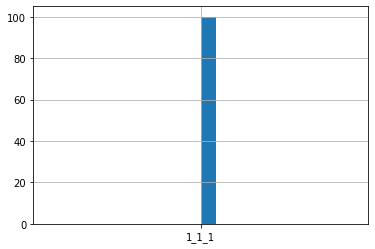

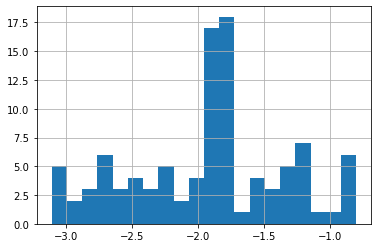

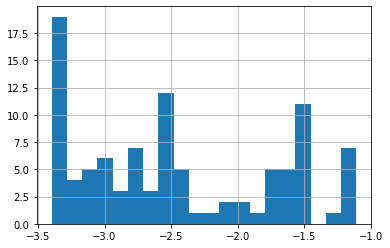

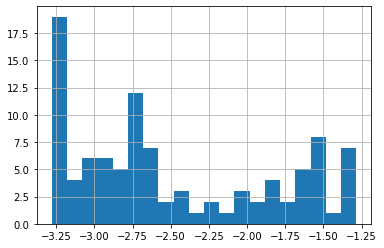

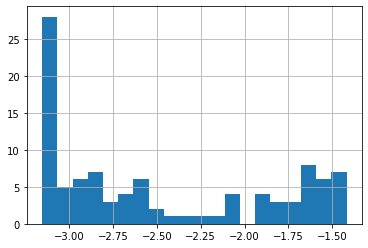

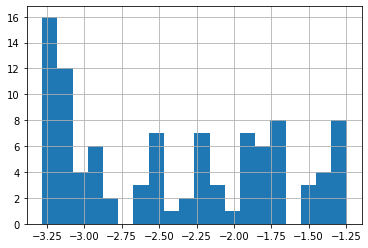

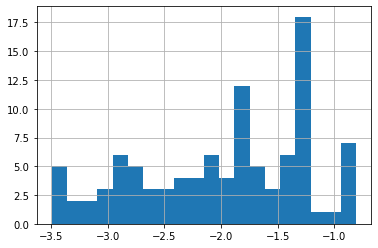

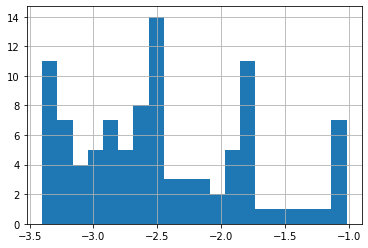

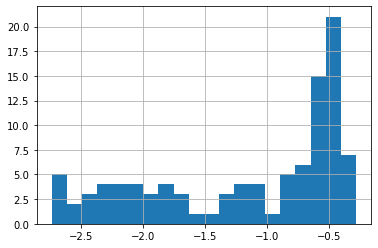

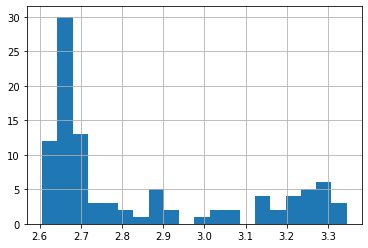

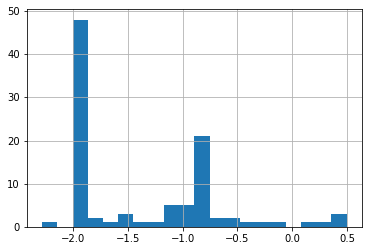

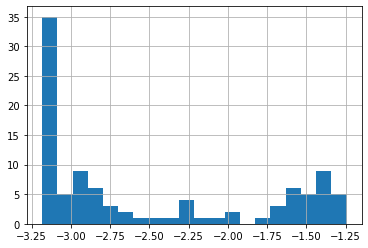

In [22]:
window1_1_1 = dataset[dataset['day_cycle_window'] == '1_1_1']
for i in range(dataset.shape[1]):
    plt.figure()
    window1_1_1.iloc[:,i].hist(bins = 20)

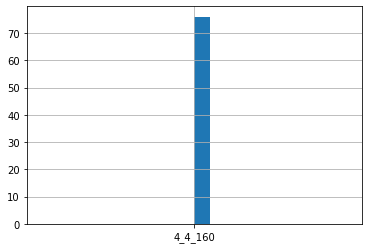

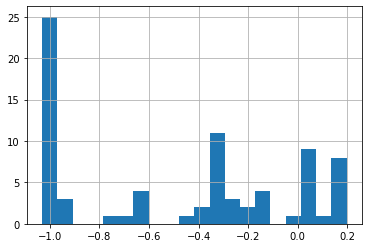

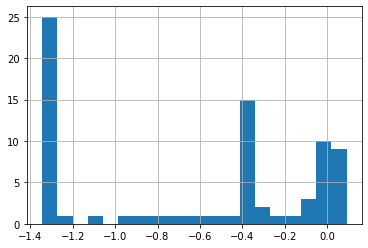

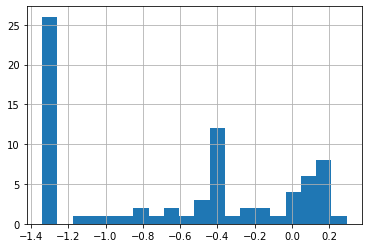

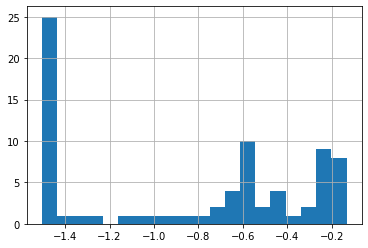

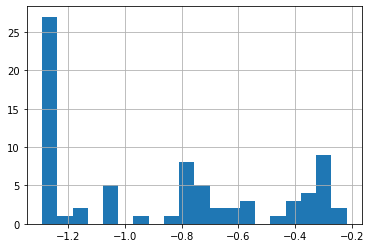

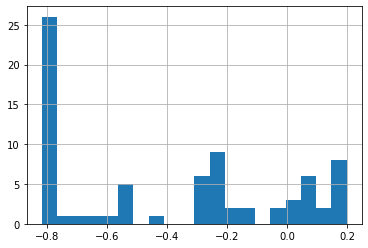

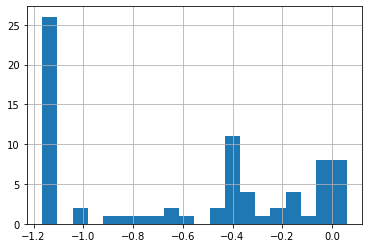

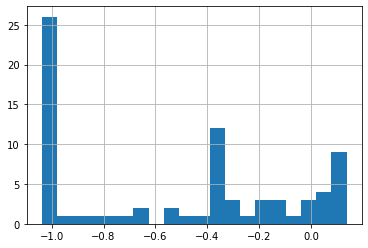

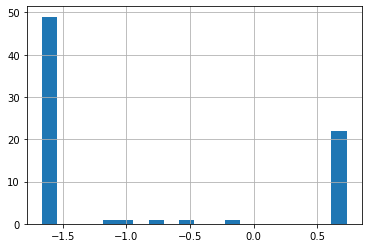

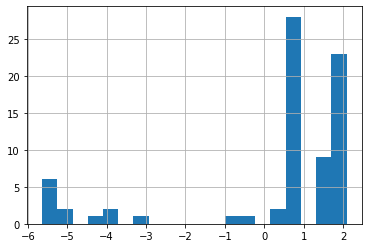

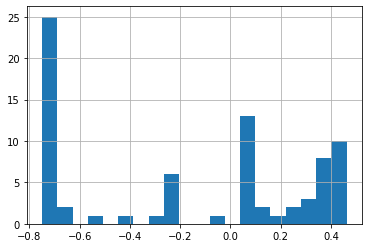

In [21]:
from sklearn.neighbors import KernelDensity
window4_4_160 = dataset[dataset['day_cycle_window'] == '4_4_160']
for i in range(dataset.shape[1]):
    plt.figure()
    window4_4_160.iloc[:,i].hist(bins = 20)

In [30]:
from sklearn.neighbors import KernelDensity
X = window4_4_160.values
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
kde.score_samples(X).shape

((76,), (76, 12))

In [30]:
dataset['day_cycle_window'].nunique()

1637

<AxesSubplot:>

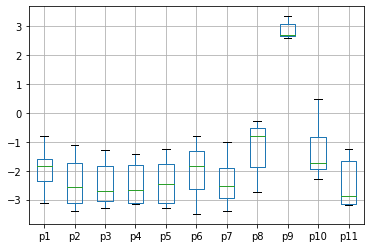

In [27]:
window1_1_1.boxplot()

In [34]:
dataset.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
count,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000
mean,0.000009,0.000011,0.000031,0.000005,0.000016,-0.000005,-0.000002,0.000003,-0.000021,0.000026,0.000030
std,0.999950,0.999925,0.999961,0.999925,0.999963,0.999926,0.999950,0.999949,0.997770,0.999686,0.999847
min,-3.211980,-3.395387,-3.325651,-3.378450,-3.281286,-4.200181,-3.898025,-3.524957,-13.704556,-12.044778,-3.183571
25%,-0.678808,-0.482716,-0.629123,-0.491585,-0.612334,-0.559023,-0.606135,-0.736398,-0.593096,-0.498480,-0.658530
50%,0.041883,0.180360,0.041442,0.147397,0.117040,0.153972,0.186038,-0.012354,-0.034882,-0.257635,-0.015437
75%,0.743973,0.656920,0.659246,0.636887,0.712393,0.685353,0.718237,0.802395,0.508232,0.359773,0.636740
max,5.013899,6.260782,8.652950,8.359670,6.424227,5.638259,3.735957,4.667058,8.203706,5.597387,9.204384


In [7]:
dataset.groupby(["day_cycle_window"]).describe()

p1                                                    \
                  count      mean       std       min       25%       50%   
day_cycle_window                                                            
1_1_1             100.0 -1.926141  0.591155 -3.107670 -2.338262 -1.849016   
1_1_10            100.0  1.204735  0.245958  0.900633  0.982340  1.118294   
1_1_11            100.0  0.742475  0.133627  0.486868  0.619690  0.800962   
1_1_12            100.0  0.300162  0.089126  0.169069  0.228873  0.290764   
1_1_13            100.0  0.140935  0.006691  0.137776  0.137776  0.137776   
...                 ...       ...       ...       ...       ...       ...   
4_4_95            100.0 -0.372836  0.024870 -0.421584 -0.388726 -0.368190   
4_4_96            100.0 -0.422993  0.039166 -0.460128 -0.451282 -0.451282   
4_4_97            100.0 -0.453629  0.018503 -0.491722 -0.460760 -0.453810   
4_4_98            100.0 -0.496385  0.027789 -0.527740 -0.515734 -0.504360   
4_4_99            100.0 -0.498456  0.015669 -0.519841 -0.514470 -0.498989   

                                         p2            ...       p10  \
                       75%       max  count      mean  ...       75%   
day_cycle_window                                       ...             
1_1_1            -1.582460 -0.805191  100.0 -2.456284  ... -0.838175   
1_1_10            1.445828  1.582127  100.0  1.123558  ... -0.081825   
1_1_11            0.854041  0.900633  100.0  0.703459  ... -0.083785   
1_1_12            0.362420  0.486868  100.0  0.289058  ... -0.078885   
1_1_13            0.139862  0.161408  100.0  0.152487  ... -0.080845   
...                    ...       ...    ...       ...  ...       ...   
4_4_95           -0.357448 -0.332488  100.0  0.141482  ...  0.720501   
4_4_96           -0.410807 -0.346390  100.0  0.074675  ...  0.179593   
4_4_97           -0.449070 -0.412737  100.0  0.040768  ...  0.172520   
4_4_98           -0.483152 -0.430298  100.0  0.077945  ...  0.169853   
4_4_99           -0.488405 -0.465499  100.0  0.093287  ... -1.062697   

                              p11                                          \
                       max  count      mean       std       min       25%   
day_cycle_window                                                            
1_1_1             0.495528  100.0 -2.500060  0.724468 -3.183571 -3.136979   
1_1_10           -0.070064  100.0  1.016565  0.211292  0.807778  0.863262   
1_1_11           -0.075944  100.0  0.669938  0.121043  0.450576  0.552634   
1_1_12           -0.068104  100.0  0.303699  0.068842  0.208743  0.250897   
1_1_13           -0.070064  100.0  0.186059  0.005184  0.179901  0.182119   
...                    ...    ...       ...       ...       ...       ...   
4_4_95            0.727679  100.0 -0.683516  0.015195 -0.709847 -0.695653   
4_4_96            0.720501  100.0 -0.722753  0.039959 -0.762255 -0.744785   
4_4_97            0.183183  100.0 -0.741979  0.006298 -0.756796 -0.746969   
4_4_98            0.176518  100.0 -0.652738  0.054358 -0.740418 -0.714214   
4_4_99           -1.059621  100.0 -0.491415  0.021494 -0.565724 -0.499960   

                                                
                       50%       75%       max  
day_cycle_window                                
1_1_1            -2.857906 -1.674682 -1.244472  
1_1_10            0.916551  1.102858  1.437874  
1_1_11            0.722549  0.772280  0.807778  
1_1_12            0.293052  0.342649  0.450576  
1_1_13            0.182156  0.190994  0.197741  
...                    ...       ...       ...  
4_4_95           -0.689974 -0.667265 -0.656346  
4_4_96           -0.736051 -0.730592 -0.632326  
4_4_97           -0.741510 -0.739599 -0.731683  
4_4_98           -0.634510 -0.612673 -0.565724  
4_4_99           -0.479468 -0.476193 -0.472917  

[1637 rows x 88 columns]

In [38]:
mad_per_window = dataset.groupby(["day_cycle_window"]).mad()
mad_per_window.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
day_cycle_window,,,,,,,,,,,
1_1_1,0.463752,0.632580,0.579932,0.570785,0.617504,0.627031,0.542205,0.677661,2.158753e-01,0.591475,0.658499
1_1_10,0.216743,0.210858,0.202804,0.184145,0.144780,0.232984,0.208164,0.238541,7.216450e-16,0.005882,0.174643
1_1_11,0.118363,0.118932,0.109141,0.104514,0.087476,0.132185,0.115529,0.137469,7.216450e-16,0.006518,0.108737
1_1_12,0.074705,0.064983,0.063099,0.067196,0.072499,0.081201,0.072584,0.088408,7.216450e-16,0.007079,0.057651
1_1_13,0.004574,0.003420,0.002344,0.005038,0.011773,0.005051,0.005694,0.008366,7.216450e-16,0.007308,0.004661


<AxesSubplot:>

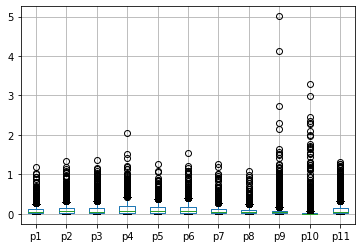

In [39]:
mad_per_window.boxplot()

In [65]:
n_len = len(mean_per_window.index)
p = 0.7
mad_per_window_train = mad_per_window[:int(n_len*p)]
mad_per_window_test = mad_per_window[int(n_len*p):]

0.7961606856268049


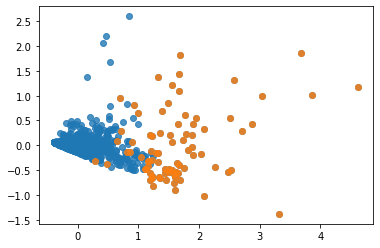

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca.fit(mad_per_window_train)
X = pca.transform(mad_per_window)
print(sum(pca.explained_variance_ratio_))
V = pca.components_
plt.figure()
plt.scatter(X[:,0], X[:,1], alpha=.8)
plt.scatter(X[index][:,0], X[index][:,1], alpha=.8)

In [112]:
from sklearn.ensemble import IsolationForest
from scipy import stats
import numpy as np
iso = IsolationForest(behaviour='new', n_estimators=100, contamination=0.15)
## mad_per_window
iso_mad_pred = iso.fit_predict(mad_per_window)

mad_per_window_normal_1 = mad_per_window[iso_mad_pred == 1]
mad_per_window_outlier_1 = mad_per_window[iso_mad_pred == -1]

scores_pred = iso.decision_function(mad_per_window)
print(f'scores_pred = {scores_pred}')
print(f'lenth of scores_pred = {len(scores_pred)}')

outliers_fraction = 0.15
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction) 
print(f'threshold = {threshold}')

print(f'argmin(scores_pred) = {np.argmin(scores_pred)}')
print(min(scores_pred))
print(mad_per_window.iloc[1324])

percent = 0.05
i = np.int(percent * mad_per_window.shape[0])
print(mad_per_window.shape[0])

print(max(sorted(scores_pred)[:i]))
scores_pred[scores_pred<max(sorted(scores_pred)[:i])]
index = np.argsort(scores_pred)[:i]
mad_per_window.iloc[index]

/Users/z.wu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


scores_pred = [-0.16948122  0.01965889  0.08964642 ...  0.10337628  0.05159834
  0.1029234 ]
lenth of scores_pred = 1637
threshold = -1.9488534050426942e-17
argmin(scores_pred) = 1324
-0.3287174699254981
p1     1.195353
p2     1.332193
p3     1.353885
p4     2.049470
p5     1.260762
p6     1.544423
p7     0.906302
p8     0.888783
p9     0.986178
p10    0.186868
p11    1.304201
Name: 4_2_2, dtype: float64
1637
-0.10048911873504307


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
day_cycle_window,,,,,,,,,,,
4_2_2,1.195353,1.332193,1.353885,2.049470,1.260762,1.544423,0.906302,0.888783,0.986178,0.186868,1.304201
1_1_68,1.034757,1.081669,1.149655,0.911072,0.698432,1.097207,0.959134,1.084695,1.229115,3.284996,1.054589
1_1_62,1.011495,1.062879,1.078710,0.858026,0.564896,1.031878,0.908317,0.981842,0.933130,1.639993,1.034513
4_1_49,0.803219,0.959048,1.153429,0.965678,0.724327,1.007028,0.899575,0.777938,0.923457,2.265764,1.047657
3_3_57,0.891614,0.931651,1.005813,1.010023,0.682347,1.046038,1.015531,0.935156,1.028106,0.504641,0.865112
...,...,...,...,...,...,...,...,...,...,...,...
1_4_1,0.353441,0.406894,0.393528,0.369746,0.283761,0.406206,0.356436,0.355154,0.251140,1.165550,0.395219
2_3_67,0.452920,0.494753,0.492724,0.427788,0.278473,0.450669,0.404564,0.306864,0.393465,0.307816,0.799277
2_3_107,0.321499,0.728979,0.409807,0.330112,0.279874,0.406524,0.425521,0.303623,0.999384,0.297519,0.720311


Outlier detection 

In [32]:
clf = IsolationForest(behaviour='new', n_estimators=100, contamination=0.15)
clf.fit(mean_per_window_train)

/Users/z.wu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


IsolationForest(behaviour='new', contamination=0.15)

In [34]:
y_pred_train = clf.predict(mean_per_window_train)
y_pred_test = clf.predict(mean_per_window_test)

In [41]:
score = clf.decision_function(mean_per_window_test)
nb_normal = len(score[score>=0])
nb_anomaly = len(score[score<0])
nb_normal, nb_anomaly

(399, 93)

Training on the whole dataset. Tests are done on IsolationForest and EllipticEnvelope

In [76]:
clf_all = IsolationForest(behaviour='new', n_estimators=100, contamination=0.1)
clf_all.fit(mean_per_window)
y_pred = clf_all.predict(mean_per_window)
score = clf_all.decision_function(mean_per_window)
nb_normal = len(score[score>=0])
nb_anomaly = len(score[score<0])
print(f' The number of normal windows are {nb_normal}.')
print(f' The maximal score of normal windows are {np.max(score[score>=0])}.')
print(f' The minimal score of normal windows are {np.min(score[score>=0])}.')
print(f' The mean score of normal windows are {np.mean(score[score>=0])}.\n')

print(f' The number of abnormal windows are {nb_anomaly}.')
print(f' The minimal score of abnormal windows are {np.min(score[score<0])}.')
print(f' The maximal score of normal windows are {np.max(score[score<0])}.')
print(f' The mean score of abnormal windows are {np.mean(score[score<0])}.\n')


/Users/z.wu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


 The number of normal windows are 1473.
 The maximal score of normal windows are 0.14789802791385143.
 The minimal score of normal windows are 2.650686398120161e-05.
 The mean score of normal windows are 0.08563158092893376.

 The number of abnormal windows are 164.
 The minimal score of abnormal windows are -0.24839519310464397.
 The maximal score of normal windows are -3.976029597185793e-05.
 The mean score of abnormal windows are -0.04790386215008195.



In [63]:
clf_ee = EllipticEnvelope(contamination=0.10)
clf_ee.fit(mean_per_window)
score = clf_ee.decision_function(mean_per_window)
nb_normal = len(score[score>=0])
nb_anomaly = len(score[score<0])
nb_normal, nb_anomaly

(1473, 164)